In [24]:
import cv2
from matplotlib import pyplot as plt
import numpy as np



In [ ]:
frame = cv2.imread("x1.jpeg")

#convert image to grayscale
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#get image to binary and remove noise
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
#find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#save image with the first contour
cv2.drawContours(frame, contours, 0, (0, 255, 0), 3)
cv2.imwrite("x3.jpeg", frame)
#draw contours
cv2.drawContours(frame, contours, -1, (0, 255, 0), 2)
# #save image

cv2.imwrite("x.jpeg", frame)
cv2.imshow("frame", frame)
RGB_im = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.plot(frame)



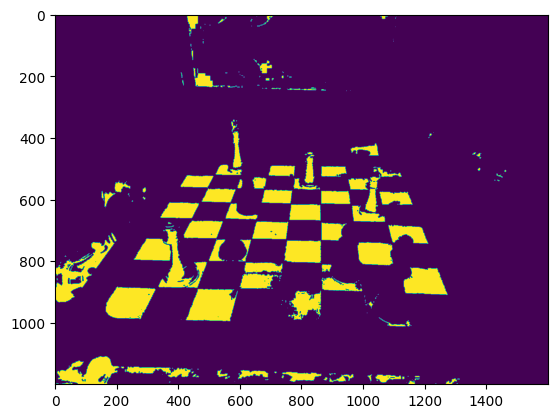

In [88]:
image = cv2.imread('x1.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#highlight a specific color
lower = np.array([0, 0, 0])
upper = np.array([17, 89, 104])
mask = cv2.inRange(image, lower, upper)


# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(mask,(5,5),0)
ret3,binary = cv2.threshold(blur,50,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


# output = cv2.bitwise_and(image, image, mask = mask)
# binary = cv2.threshold(mask,50,255, cv2.THRESH_BINARY)[1]
plt.imshow(binary)








#turn output to grayscale
# gray = cv2.cvtColor(output, cv2.COLOR_RGB2GRAY)
# plt.imshow(gray)

#find contours
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#draw contours
#cv2.drawContours(binary, contours, -1, (0, 255, 0), 2)
#save image
#plot image




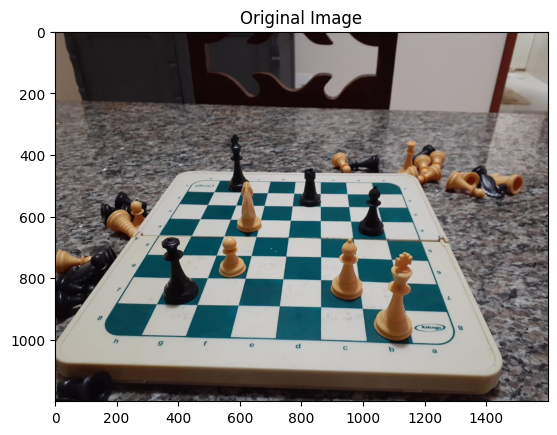

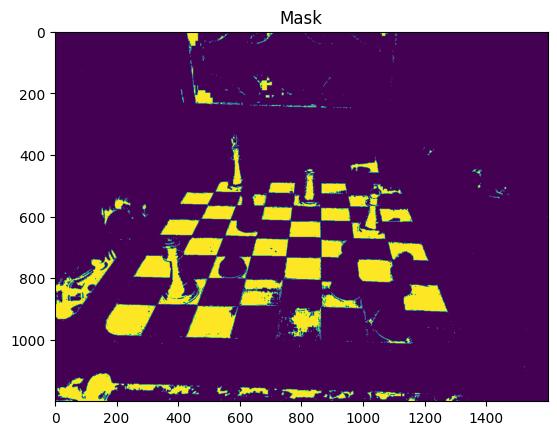

In [89]:
#find contours
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#Plot the contours
plt.imshow(image)
plt.title("Original Image")
plt.show()
plt.imshow(mask)
plt.title("Mask")
plt.show()
# plt.imshow(output)
# plt.title("Output")
# plt.show()

#cv2.drawContours(image, contours, -1, (0, 255, 0), 2)
#plt.imshow(image)
#plt.title("Contours")
#plt.show()



[[[653. 676.]]

 [[641. 728.]]

 [[749. 729.]]

 [[755. 674.]]]
[[[641 674]]

 [[641 730]]

 [[756 730]]

 [[756 674]]]


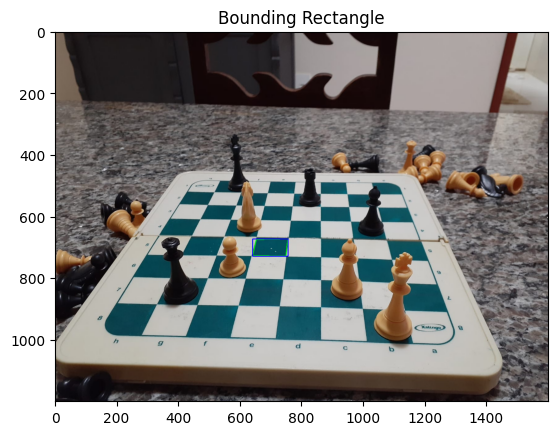

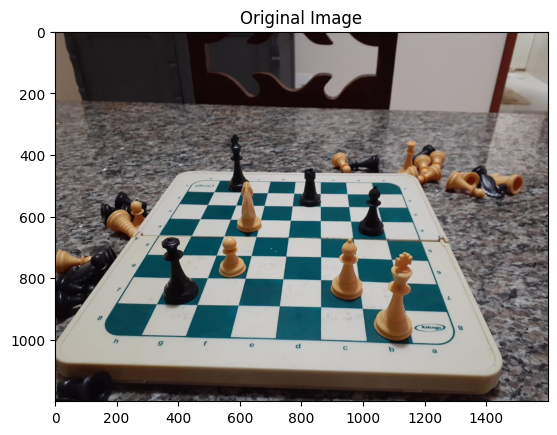

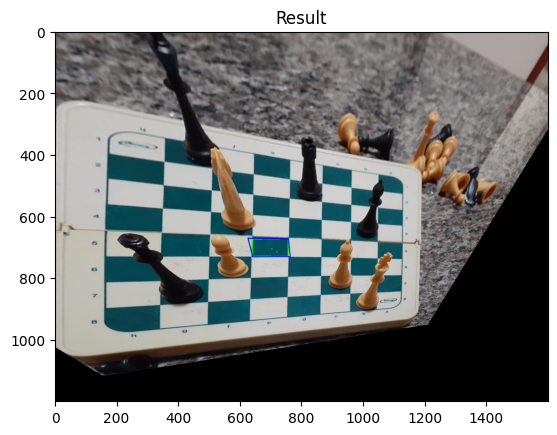

In [92]:
for c in contours:
    approx = cv2.approxPolyDP(c,0.01*cv2.arcLength(c,True),True)
    #if it has 4 corners, it is a rectangle
    if len(approx) == 4:
        #get the bounding rectangle
        x, y, w, h = cv2.boundingRect(approx)


        #draw the rectangle
        #if the rectangle is too small, ignore it
       
        if w > 20 or h > 20:
            # continue
            #copy image into another variable
            crop = image.copy()

            #get transformation perspective from approx points
            pts1 = np.float32([approx[0], approx[1], approx[2], approx[3]])
            pts2 = np.float32([[x, y], [x, y + h], [w + x,y + h], [x + w, y ]])
            #make pts2 the same shape as pts1
            pts2 = pts2.reshape((4,1, 2))

            print(pts1)
            print(np.int32(pts2))
            #drawn pts1 square on image
            cv2.polylines(crop, [approx], True, (0, 255, 0), 2)
            #drawn pts2 square on image
            cv2.polylines(crop, [np.int32(pts2)], True, (0, 0, 255), 2)
            #display image
            plt.imshow(crop)
            plt.title("Bounding Rectangle")
            plt.show()
            
            crop2 = image.copy()
            matrix = cv2.getPerspectiveTransform(pts1, pts2)
            result = cv2.warpPerspective(crop, matrix, (crop2.shape[1],crop2.shape[0]))
            plt.imshow(crop2)
            plt.title("Original Image")
            plt.show()
            #show the image
            plt.imshow(result)
            plt.title("Result")
            plt.show()

            
            break